# Machine Learnig Model for Price Pediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv('Boston_Housing.csv')

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per  10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in  1000's

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


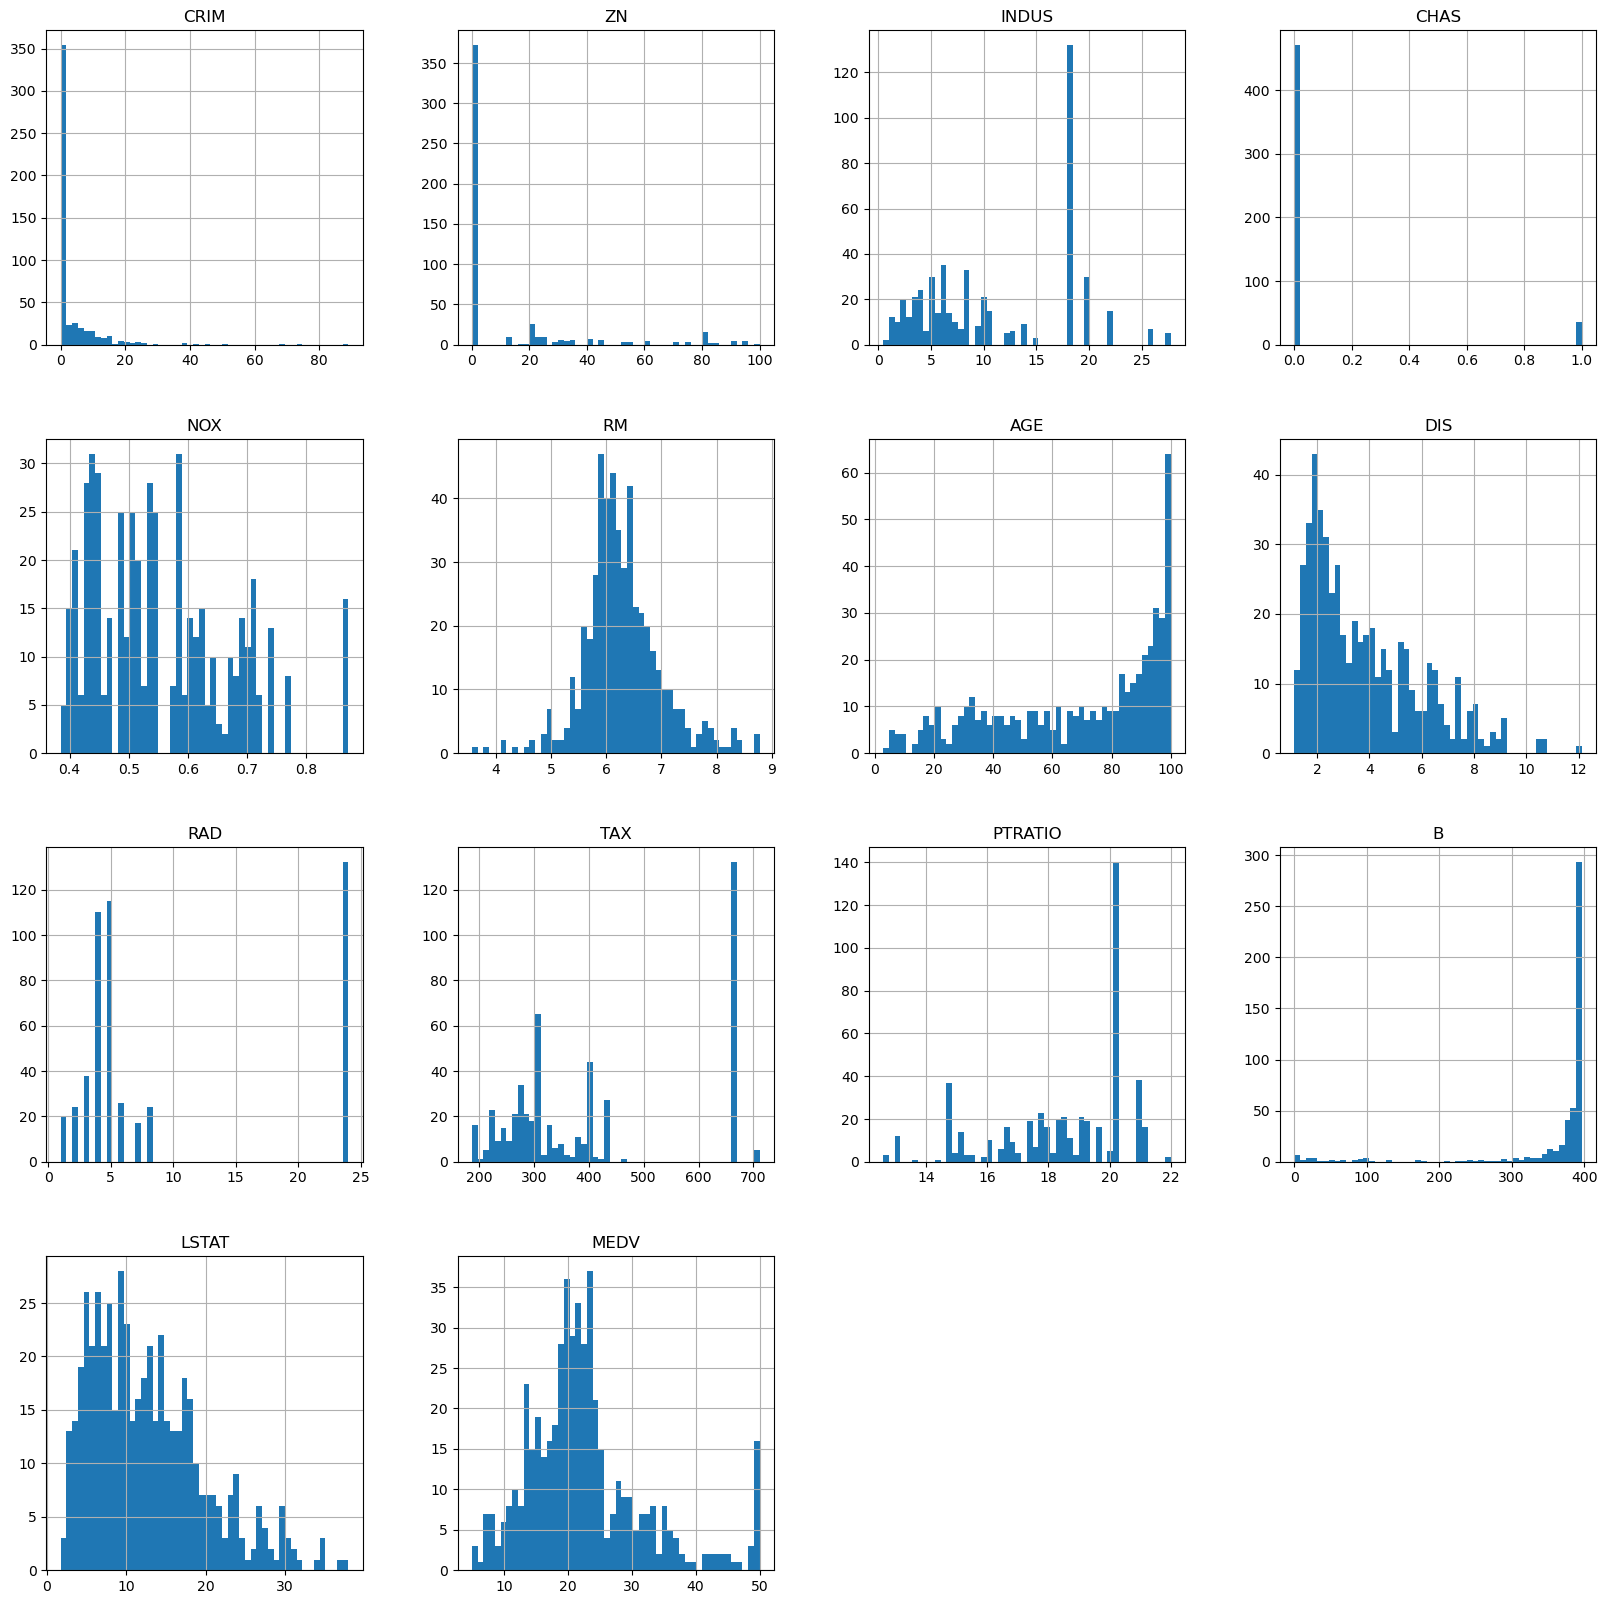

In [9]:
housing.hist(bins=50,figsize=(20,20))
plt.show()

### Training data & Testing Data

In [20]:
# def train_test_data(data,test_ratio):
#     np.random.seed(30)
#     shuffled = np.random.permutation(len(data))
#     x= int(len(data)*test_ratio)
#     test_indices = shuffled[:x]
#     train_indices = shuffled[x:]
#     return data.iloc[test_indices],data.iloc[train_indices]

In [21]:
test_set,train_set = train_test_data(housing,0.2)

In [22]:
print(f"Raws in train set = {len(train_set)},\nRaws in test set = {len(test_set)}")

Raws in train set = 405,
Raws in test set = 101


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_set,test_set = train_test_split(housing,test_size = 0.20,random_state = 34)

In [25]:
print(f"Raws in train set = {len(train_set)},\nRaws in test set = {len(test_set)}")

Raws in train set = 404,
Raws in test set = 102


In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

In [33]:
split = StratifiedShuffleSplit(n_splits =1,test_size =0.2,random_state = 34)
for train_index,test_index in split.split(housing,housing['CHAS']):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]
    

In [36]:
train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [37]:
test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

## test data set


In [61]:
housing = train_set.copy()

In [62]:
#lets find realtionship between price and all other attributes
corr_matrix = housing.corr()

In [63]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.671204
ZN         0.361305
B          0.344929
DIS        0.269081
CHAS       0.138573
RAD       -0.379916
CRIM      -0.387453
AGE       -0.394603
NOX       -0.437226
TAX       -0.460791
INDUS     -0.477875
PTRATIO   -0.485222
LSTAT     -0.743850
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

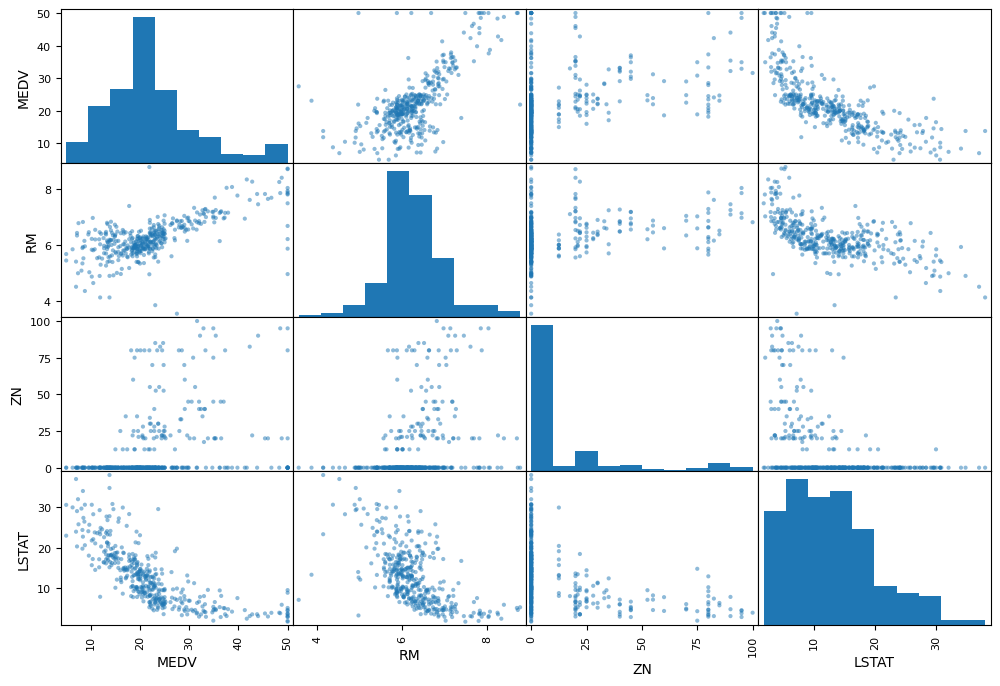

In [64]:
#lets take look of graphycal representation, so we can remove outliers
attributes = ['MEDV','RM','ZN','LSTAT']
pd.plotting.scatter_matrix(housing[attributes],figsize=(12,8))

## creating features and labels for testing the model

In [91]:
housing_features = housing.drop('MEDV',axis =1)
housing_labels = housing['MEDV'].copy()

In [81]:
from sklearn.impute import SimpleImputer

## Creating Pipeline

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [86]:
my_pipeline = Pipeline(
    [
        ('imputer',SimpleImputer(strategy = 'median')),
        ('std_scaller',StandardScaler())
        
    ]
)

In [92]:
housing_num_final = my_pipeline.fit_transform(housing_features)  # we will get numpy array after trasformin from pipeline

In [93]:
housing_num_final

array([[-0.41477918, -0.49423526,  0.37035623, ..., -0.97623574,
         0.40484718,  0.09803513],
       [-0.39894524, -0.49423526, -0.5806061 , ...,  0.53432987,
         0.41419748, -1.07224251],
       [-0.31403674, -0.49423526,  1.53897354, ...,  1.28961267,
        -0.97687079,  0.62556242],
       ...,
       [-0.40584133,  0.0327125 , -0.77196719, ...,  0.20389364,
         0.44841104, -0.55720929],
       [ 0.45239481, -0.49423526,  0.98534109, ...,  0.81756092,
        -0.02250361,  0.74078549],
       [-0.41225892, -0.49423526, -1.29930575, ..., -0.31536329,
         0.44841104, -0.46558613]])

In [94]:
housing_num_final.shape

(404, 13)

# model Selection


### 1 Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit (housing_num_final,housing_labels)

LinearRegression()

###### Evaluating the Model

In [115]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_final)
lin_mse = mean_squared_error(housing_labels,housing_prediction)  #lin_mse = linear mean squared error
lin_rmse = np.sqrt(lin_mse) #lin_rmse = root of mean squared error
lin_rmse

4.781773558755371

In [125]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_final,housing_labels,scoring = 'neg_mean_squared_error',cv =10)
rmse_scores = np.sqrt(-scores)
rmse_scores
print("Linear Regresion - Model")
print(f"mean : {rmse_scores.mean()}")
print(f"standat_deviation : {rmse_scores.std()}")

Linear Regresion - Model
mean : 4.944986597030601
standat_deviation : 0.892431787688315


## 2 Desicion Treee

In [114]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit (housing_num_final,housing_labels)

DecisionTreeRegressor()

#### Evaluating Model

In [116]:
housing_prediction = model2.predict(housing_num_final)
lin_mse = mean_squared_error(housing_labels,housing_prediction)  #lin_mse = linear mean squared error
lin_rmse = np.sqrt(lin_mse) #lin_rmse = root of mean squared error
lin_rmse

0.0

#### Cross Validation  because model overfitting

In [124]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2,housing_num_final,housing_labels,scoring = 'neg_mean_squared_error',cv =10)
rmse_scores = np.sqrt(-scores)
rmse_scores
print("DecisionTreeRegressor - Model")
print(f"mean : {rmse_scores.mean()}")
print(f"standat_deviation : {rmse_scores.std()}")

DecisionTreeRegressor - Model
mean : 4.36400414697645
standat_deviation : 0.7893518491507516


### 3  RandomForestRegressor

In [126]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(housing_num_final,housing_labels)

RandomForestRegressor()

In [127]:

scores = cross_val_score(model3,housing_num_final,housing_labels,scoring = 'neg_mean_squared_error',cv =10)
rmse_scores = np.sqrt(-scores)
rmse_scores
print("Randomforest - Model")
print(f"mean : {rmse_scores.mean()}")
print(f"standat_deviation : {rmse_scores.std()}")



Randomforest - Model
mean : 3.2104905235270493
standat_deviation : 0.7275992657457409


## Model Deployment


In [ ]:
#Joblib